#Digital Image Processing - Create Images - 2022.1
##Aluno: Derek Nielsen Araújo Alves - Engenharia de Computação - 17212092
##Professor: Tiago Vieira

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def plot3d(fig, x, y, z, tit, plots):
  fig.set_facecolor('silver')
  ax = fig.add_subplot(plots[0], plots[1], plots[2], projection='3d')
  ax.set_title(tit)
  ax.plot_surface(x, y, z, cmap="viridis", linewidth=0, antialiased=True, alpha=0.5)
  
def plot2d(fig, x, y, tit, plots):
  fig.set_facecolor('silver')
  ax = fig.add_subplot(plots[0], plots[1], plots[2])
  ax.set_title(tit)
  ax.plot(x, y)


###(1) Create the image of a paraboloid with one axis scaled (like an oval paraboloid).

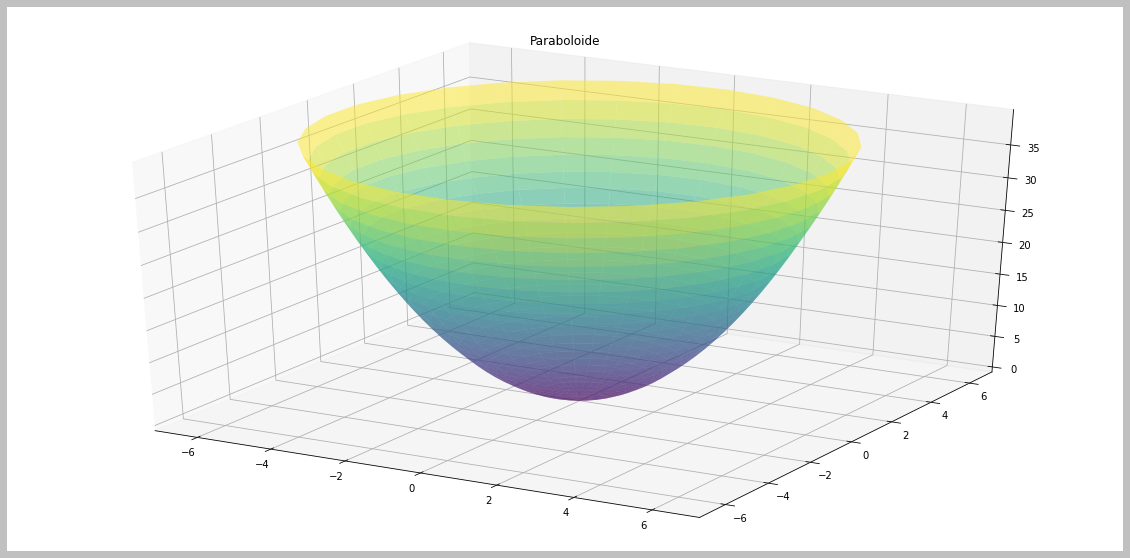

In [3]:
r = np.linspace(0, 2*np.pi, 30)

r, t = np.meshgrid(r, r)
x = r * np.cos(t)
y = r * np.sin(t)
z = r**2

fig = plt.figure(figsize=(20,10))
plot3d(fig, x, y, z, "Paraboloide", (1,1,1))
fig.show()

###(2) Create the image of a rotated sin(x) using rotation of coordinates.

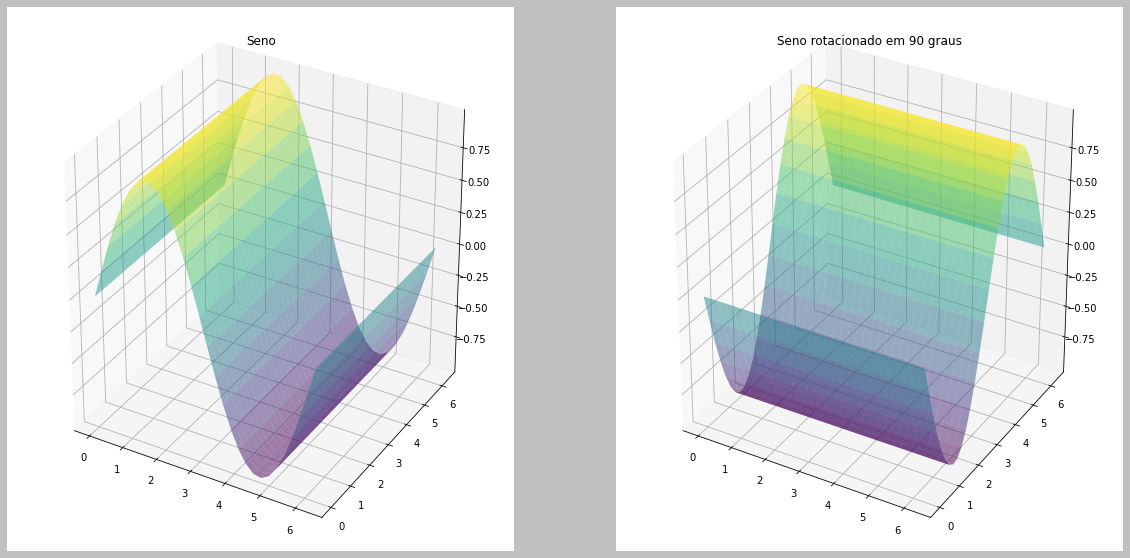

In [4]:
r = np.linspace(0, 2*np.pi, 30)
x, y = np.meshgrid(r,r)

fig = plt.figure(figsize=(20,10))
plot3d(fig, x, y, np.sin(x), "Seno", (1, 2, 1))
plot3d(fig, x, y, np.rot90(np.sin(x)), "Seno rotacionado em 90 graus", (1,2,2))
fig.show()

###(3) Create the image of a gaussian in 2D.

In [5]:
def gaussian2d(mean, std):
  x = np.linspace(mean - 3*std, mean + 3*std, 200)
  y = stats.norm.pdf(x, mean, std)
  return x, y


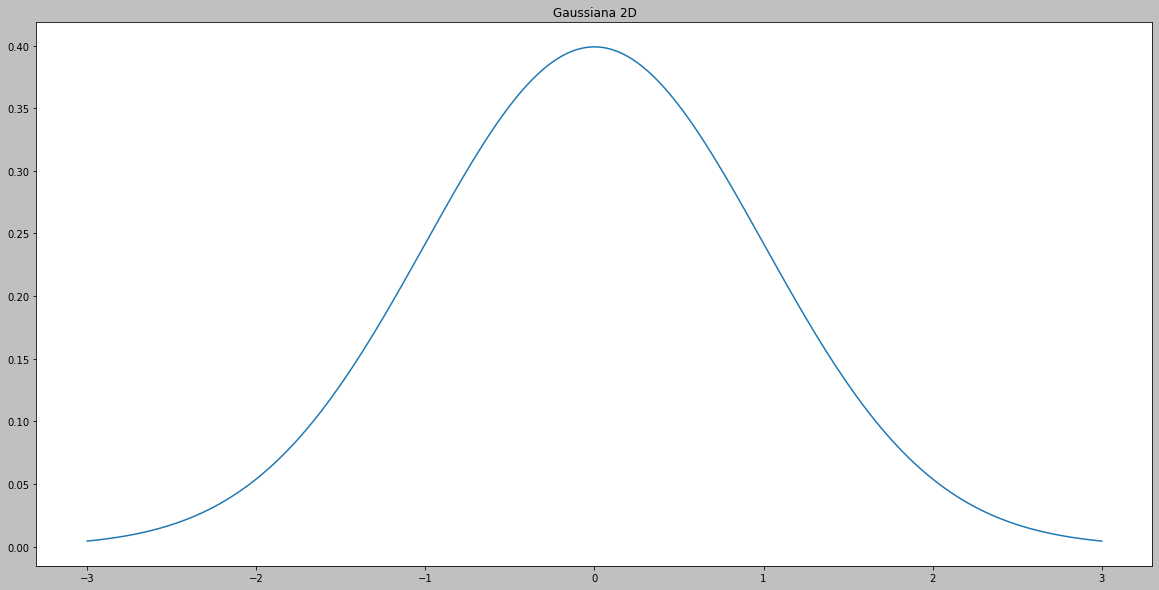

In [6]:
mean = 0
std = np.sqrt(1)
x, y = gaussian2d(mean, std)

fig = plt.figure(figsize=(20, 10))
plot2d(fig, x, y, "Gaussiana 2D", (1,1,1))
fig.show()

###(4) Create a function that generates the image of a Gaussian optionally rotated by an angle $\theta$ and with mx my, sx, sy as input arguments.

In [7]:
def gaussian3d(mx, my, sx, sy, k, n):
  x_ = np.linspace(mx - k*sx, mx + k*sx, n)
  y_ = np.linspace(my - k*sy, my + k*sy, n)

  x, y = np.meshgrid(x_, y_)
  xy = np.sqrt((x - mx/k)**2 + (y - my)**2)
  z = ((1. / (sx * np.sqrt(2 * np.pi))) * np.exp((-1 * (xy)**2) / (2 * sy**2)))

  return x, y, z

In [8]:
def rotate(x, y, z, theta):
  t= np.transpose(np.array([x,y,z]), (2,1,0))
  rot_matrix = [[np.cos(theta),  np.sin(theta),  0],
                [-np.sin(theta), np.cos(theta),  0],
                [0,              0,              1]]
  xr, yr, zr = np.transpose(np.dot(t, rot_matrix), (2,1,0))
  return xr, yr, zr


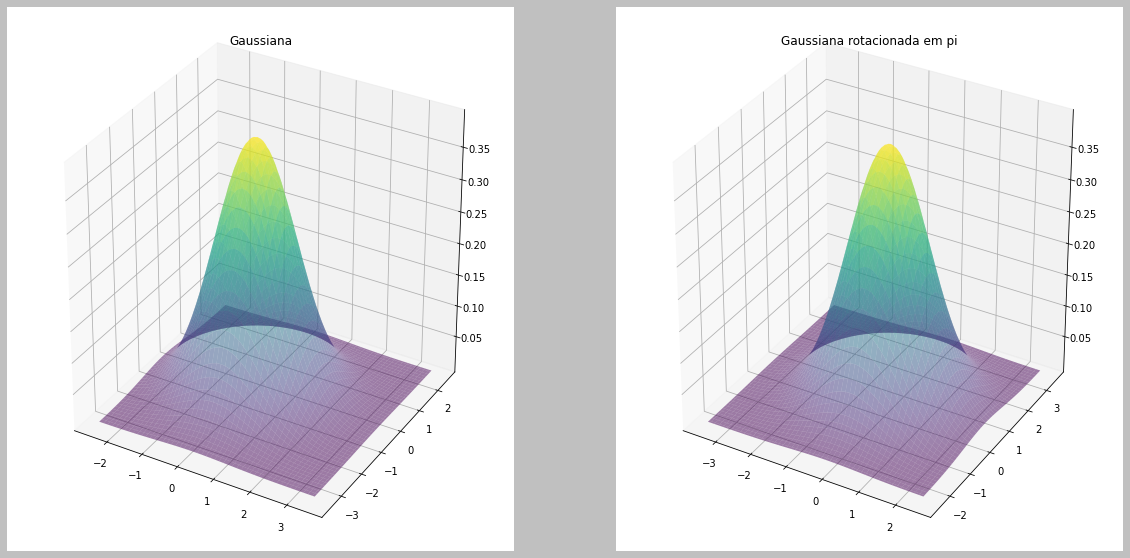

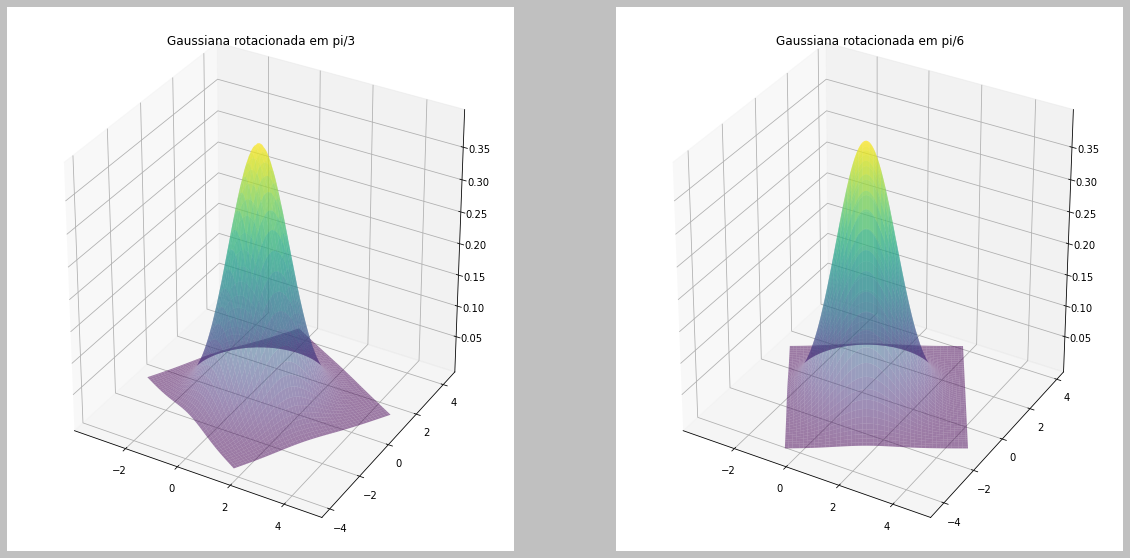

In [9]:
x, y, z = gaussian3d(0.5, -0.5, np.sqrt(1), np.sqrt(1), 3, 100)

fig = plt.figure(figsize=(20,10))
plot3d(fig, x, y, z, "Gaussiana", (1, 2, 1))
xr, yr, zr = rotate(x, y, z, np.pi)
plot3d(fig, xr, yr, zr, "Gaussiana rotacionada em pi", (1, 2, 2))
fig.show()
fig = plt.figure(figsize=(20,10))
xr, yr, zr = rotate(x, y, z, np.pi/3)
plot3d(fig, xr, yr, zr, "Gaussiana rotacionada em pi/3", (1, 2, 1))
xr, yr, zr = rotate(x, y, z, np.pi/6)
plot3d(fig, xr, yr, zr, "Gaussiana rotacionada em pi/6", (1, 2, 2))
fig.show()